In [3]:
options(warn=-1)

# load libraries 
library(igraph)
library(bootnet)
library(qgraph)
library(Hmisc)
library(ggplot2)
library(VIM)
library(gplots)
library(mice)
library(Rmisc)

In [2]:
load("sfari.RData")


 Variables sorted by number of missings: 
                      Variable       Count
                 a1_non_echoed 1.000000000
            abc_iii_stereotypy 1.000000000
               abc_ii_lethargy 1.000000000
            abc_i_irritability 1.000000000
          abc_iv_hyperactivity 1.000000000
    abc_v_inappropriate_speech 1.000000000
            ados_communication 1.000000000
        ados_reciprocal_social 1.000000000
 rbs_r_iii_compulsive_behavior 1.000000000
       rbs_r_ii_self_injurious 1.000000000
  rbs_r_i_stereotyped_behavior 1.000000000
 rbs_r_iv_ritualistic_behavior 1.000000000
  rbs_r_vi_restricted_behavior 1.000000000
     rbs_r_v_sameness_behavior 1.000000000
          srs_parent_awareness 0.041264267
          srs_parent_cognition 0.041264267
      srs_parent_communication 0.041264267
         srs_parent_mannerisms 0.041264267
         srs_parent_motivation 0.041264267
         vabs_ii_communication 0.004828797
          vabs_ii_dls_standard 0.004828797
          v

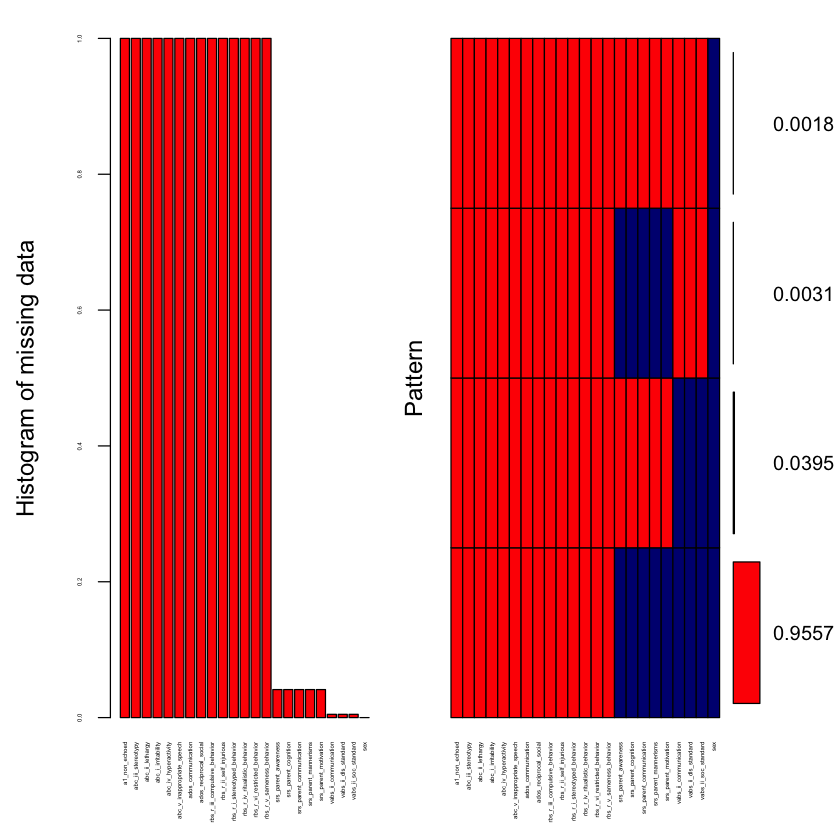

In [9]:
df.sib = read.csv("./Input/sib_ssc_commonly_used.csv")
gender = read.csv("./Input/sib_ssc_core_gender.csv")
df.sib = merge(df.sib, gender, by = 'individual')

keepNames = colnames(df)
df.sib = subset(df.sib, select=keepNames)

#inspect completeness
aggr_plot <- aggr(df.sib, col=c('navyblue','red'), 
                  numbers=TRUE, sortVars=TRUE, 
                  labels=names(data), cex.axis=.3, 
                  gap=3, ylab=c("Histogram of missing data","Pattern"))

#remove subjects with missing data
#df.sib = df.sib[complete.cases(df.sib), ]

#split genders
df.sib.M = subset(df.sib, sex == 'male')
df.sib.F = subset(df.sib, sex == 'female')
df.sib.M = subset(df.sib.M, select=-c(sex))
df.sib.F = subset(df.sib.F, select=-c(sex))

In [11]:
df.sib

a1_non_echoed,abc_iii_stereotypy,abc_ii_lethargy,abc_i_irritability,abc_iv_hyperactivity,abc_v_inappropriate_speech,ados_communication,ados_reciprocal_social,rbs_r_iii_compulsive_behavior,rbs_r_ii_self_injurious,⋯,rbs_r_v_sameness_behavior,srs_parent_awareness,srs_parent_cognition,srs_parent_communication,srs_parent_mannerisms,srs_parent_motivation,vabs_ii_communication,vabs_ii_dls_standard,vabs_ii_soc_standard,sex
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,4,5,11,1,3,117,130,110,female
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,2,3,6,6,2,90,87,102,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,4,5,1,1,120,105,120,female
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,3,1,4,0,3,116,119,105,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,6,5,15,3,6,100,100,105,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,104,112,111,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,1,0,0,1,1,140,132,102,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,4,1,1,4,2,104,95,115,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,5,10,10,2,4,120,107,118,male
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,4,6,6,0,3,125,115,124,female
